In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.duplicated().any()

False

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


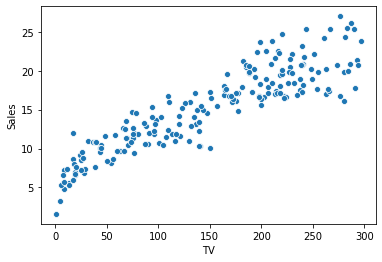

In [11]:
sns.scatterplot(df['TV'],df['Sales'])

(array([ 2.,  9., 17., 30., 29., 30., 34., 30., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <a list of 10 Patch objects>)

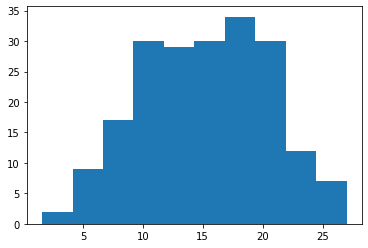

In [15]:
plt.hist(df['Sales'])

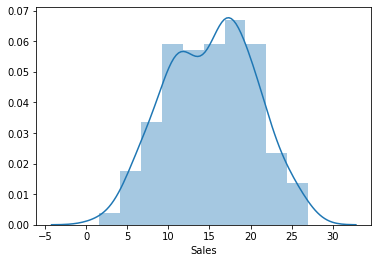

In [12]:
sns.distplot(df['Sales'])

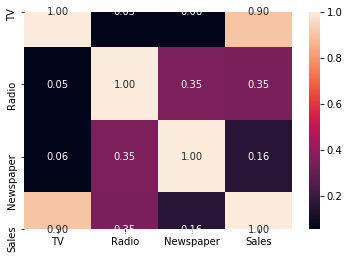

In [19]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [20]:
df=pd.read_csv('advertising.csv',usecols=['TV','Sales'])

In [21]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


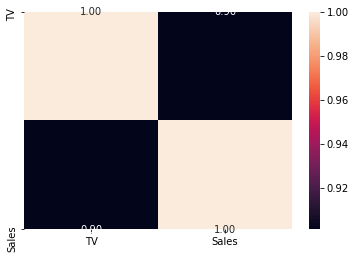

In [22]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [23]:
#Independent Variable or feature

In [24]:
X=df[['TV']]
y=df['Sales']

In [25]:
#Dividing data into train test data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [28]:
X_train.shape

(160, 1)

In [29]:
X_test.shape

(40, 1)

In [30]:
y_train.shape

(160,)

In [31]:
y_test.shape

(40,)

In [ ]:
#Simple Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression()

In [35]:
#Fitting Linear Model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#Predictions
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R2 Score:",round(r2_score(y_train,y_pred_train),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2))
print("R2 Score:",round(r2_score(y_test,y_pred_test),2))

Train Data
RMSE: 2.29
R2 Score: 0.8
Test Data
RMSE: 2.3
R2 Score: 0.84


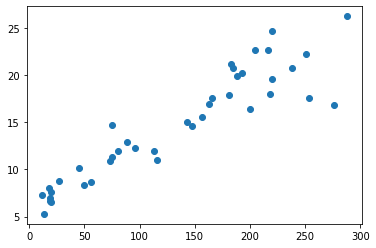

In [38]:
plt.scatter(X_test,y_test)

Text(0.5, 1.0, 'Sales Vs Tv Spending')

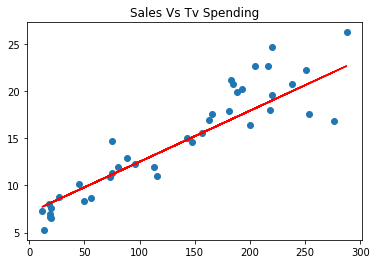

In [40]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,color='red')
plt.title('Sales Vs Tv Spending')

Text(0.5, 1.0, 'Sales Vs Tv Spending')

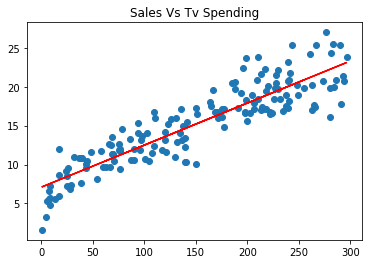

In [41]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred_train,color='red')
plt.title('Sales Vs Tv Spending')

In [42]:
#Prediction of 150$
model.predict([[150]])

array([15.20175996])

In [43]:
#Prediction of 350$
model.predict([[350]])

array([26.01156689])

In [45]:
#Prediction of 926$ spent on advertisement
model.predict([[926]])[0]-#Same value as y=mx+c

57.14381086419002

In [52]:
y_pred=model.coef_[0]*926+model.intercept_#same value as model.predict

In [54]:
y_pred

57.14381086419002